# Machine Learning Project

### Company Bankruptcy Prediction

Names:    
    - Denis Mugisha   
    - Liu Guangqiang   
    - Rachel Fanti   
    
Dataset: https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

Data: May/2021

## Libraries

In [1]:
# Basics
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns

# Statistic funtions
from numpy.random import seed
from numpy import unique
from numpy import where
from collections import Counter

# Preprocessing
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# One class SVM
from sklearn.svm import OneClassSVM

# Dbscan clustering
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

# Graphics
from sklearn.decomposition import PCA

# Evaluation of the model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve, validation_curve

# To handle imbalanced data
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
# print(imblearn.__version__)

# import notebook with the functions that evaluate the model
# 'pip install ipynb'
from ipynb.fs.full.evaluation_functions import evaluation_scenario, plot_roc_curve, evaluation_set

## Reading data 

In [2]:
df_complete = pd.read_csv('./data/data.csv', sep = ",") 
df_feat = pd.read_csv('./data/bankruptcy.csv')
df_feat

,Unnamed: 0,features,importance,select_tree,rank_rfecv,selected_rfecv,corr
0,47,Inventory Turnover Rate (times),0.001875,True,1,True,0.012556
1,71,Quick Asset Turnover Rate,0.000000,True,1,True,0.036946
2,61,Inventory/Working Capital,0.025644,True,1,True,0.055539
3,56,Cash/Total Assets,0.023681,True,1,True,0.150828
4,55,Current Assets/Total Assets,0.003832,True,1,True,0.044232
...,...,...,...,...,...,...,...
90,2,ROA(B) before interest and depreciation after...,0.000000,False,71,False,0.224163
91,48,Fixed Assets Turnover Frequency,0.000000,True,72,False,0.047546
92,32,Current Ratio,0.000000,False,73,False,0.189644
93,1,ROA(A) before interest and % after tax,0.000000,False,74,False,0.222410


In [3]:
col = df_feat[df_feat['selected_rfecv']==True]['features'].values
col = np.insert(col, 0, 'Bankrupt?')
print(col)

['Bankrupt?' ' Inventory Turnover Rate (times)'
 ' Quick Asset Turnover Rate' ' Inventory/Working Capital'
 ' Cash/Total Assets' ' Current Assets/Total Assets'
 ' Allocation rate per person' ' Net profit before tax/Paid-in capital'
 ' Borrowing dependency' ' Net worth/Assets' ' Interest Expense Ratio'
 ' Cash Reinvestment %' ' Net Value Growth Rate'
 ' Net Value Per Share (B)' ' Current Liability to Current Assets'
 ' Interest-bearing debt interest rate'
 " Net Income to Stockholder's Equity"
 ' Degree of Financial Leverage (DFL)' ' Total assets to GNP price'
 ' Non-industry income and expenditure/revenue' ' Operating Expense Rate'
 ' Research and development expense rate']


In [4]:
df = df_complete.loc[:, col]

In [5]:
df

,Bankrupt?,Inventory Turnover Rate (times),Quick Asset Turnover Rate,Inventory/Working Capital,Cash/Total Assets,Current Assets/Total Assets,Allocation rate per person,Net profit before tax/Paid-in capital,Borrowing dependency,Net worth/Assets,...,Net Value Growth Rate,Net Value Per Share (B),Current Liability to Current Assets,Interest-bearing debt interest rate,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Total assets to GNP price,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate
0,1,1.820926e-04,6.550000e+09,0.276920,0.004094,0.190643,0.037135,0.137757,0.390284,0.792424,...,0.000327,0.147950,0.118250,7.250725e-04,0.827890,0.026601,0.009219,0.302646,1.256969e-04,0.000000e+00
1,1,9.360000e+09,7.700000e+09,0.289642,0.014948,0.182419,0.012335,0.168962,0.376760,0.828824,...,0.000443,0.182251,0.047775,6.470647e-04,0.839969,0.264577,0.008323,0.303556,2.897851e-04,0.000000e+00
2,1,6.500000e+07,1.022676e-03,0.277456,0.000991,0.602806,0.141016,0.148036,0.379093,0.792484,...,0.000396,0.177911,0.025346,7.900790e-04,0.836774,0.026555,0.040003,0.302035,2.361297e-04,2.550000e+07
3,1,7.130000e+09,6.050000e+09,0.276580,0.018851,0.225815,0.021320,0.147561,0.379743,0.848535,...,0.000382,0.154187,0.067250,4.490449e-04,0.834697,0.026697,0.003252,0.303350,1.078888e-04,0.000000e+00
4,1,1.633674e-04,5.050000e+09,0.287913,0.014161,0.358380,0.023988,0.167461,0.375025,0.893491,...,0.000439,0.167502,0.047725,6.860686e-04,0.839973,0.024752,0.003878,0.303475,7.890000e+09,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,4.030000e+07,1.244230e-04,0.277543,0.099481,0.578455,0.006312,0.171111,0.373823,0.875382,...,0.000450,0.175045,0.027951,1.790179e-04,0.840359,0.027064,0.000466,0.303510,1.510213e-04,4.500000e+09
6815,0,9.940000e+09,1.173396e-04,0.277368,0.080337,0.444043,0.003401,0.171805,0.372505,0.900747,...,0.000445,0.181324,0.031470,2.370237e-04,0.840306,0.027009,0.001959,0.303520,5.220000e+09,1.440000e+09
6816,0,2.797309e-04,1.749713e-04,0.277022,0.412885,0.496053,0.002774,0.172287,0.369637,0.961061,...,0.000435,0.269521,0.007542,0.000000e+00,0.840138,0.026791,0.002840,0.303512,2.509312e-04,1.039086e-04
6817,0,4.550000e+09,1.351937e-04,0.277353,0.112238,0.564439,0.007489,0.182498,0.369649,0.913021,...,0.000529,0.213392,0.022916,2.110211e-04,0.841084,0.026822,0.002837,0.303498,1.236154e-04,2.510000e+09


In [6]:
df.to_csv('./data/bankruptcy_22.csv')

### Splitting data into train/ validate/ test sets

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
# Split into train and test sets
X_train_all, X_test_all, y_train, y_test = train_test_split (X, y, test_size=0.30, random_state=1, stratify=y) 

In [9]:
print(f"y_train = {Counter (y_train)}")
print(f"                   0: {Counter(y_train)[0]/len(y_train):.0%},  1: {Counter(y_train)[1]/len(y_train):.0%}")
print()
print(f"y_test = {Counter (y_test)}")
print(f"                  0: {Counter(y_test)[0]/len(y_test):.0%},  1: {Counter(y_test)[1]/len(y_test):.0%}")

y_train = Counter({0: 4619, 1: 154})
                   0: 97%,  1: 3%

y_test = Counter({0: 1980, 1: 66})
                  0: 97%,  1: 3%


In [10]:
n_feat = X_train_all.shape[1]
X_train = X_train_all.iloc[:,0:n_feat] # selecting the number of features
X_test = X_test_all.iloc[:,0:n_feat] # selecting the number of features

In [11]:
print(X_train.shape)

(4773, 21)


## Standardization

To avoid the effect of one feature dominating the other, it will be performed feature scaling, standardizing our data to have mean 0 and variance 1. Note that we must apply the same scaling to the test set for meaningful results. 

In [12]:
def feature_scaling(X_train, X_test):
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  # to include in pipeline?
    X_test = scaler.transform(X_test) 
    return (X_train, X_test)

In [13]:
X_train, X_test = feature_scaling(X_train, X_test)
print(X_train.shape)
# print(X_train)
# print (X_train.mean(axis=0).round(2))
# print (X_train.std(axis=0))

(4773, 21)


In [14]:
X_stand = StandardScaler().fit(X).transform(X)
print(X.shape)
print(y.shape)

(6819, 21)
(6819,)


## One class SVM

One-class classification is a field of machine learning that provides techniques for outlier and anomaly detection. 

Although not designed for these types of problems, one-class classification algorithms can be effective for imbalanced classification datasets where there are none or very few examples of the minority class, or datasets where there is no coherent structure to separate the classes that could be learned by a supervised algorithm.

It requires the choice of a kernel and a scalar parameter to define a frontier. The RBF kernel is usually chosen although there exists no exact formula or algorithm to set its bandwidth parameter. This is the default in the scikit-learn implementation. The nu parameter, also known as the margin of the One-Class SVM, corresponds to the probability of finding a new, but regular, observation outside the frontier (scikitlearn).

When calling the predict() function on the model, it will output a +1 for normal examples, so-called inliers, and a -1 for outliers.

The model can be fit on all examples in the training dataset or just those examples in the majority class. We will tried both methods.

In this case, we will use F-measure score, which is the harmonic mean of precision and recall. We can calculate the F-measure using the f1 macro score.

In [15]:
df_results = pd.DataFrame(columns = ['Scenarios','#Features', 'Train/Test', 'Acc', 'Bal_Acc','M_P','M_R', 'M_F1', "P0", "P1", "R0", "R1", 'MSE', 'Auc'])
print (df_results)

Empty DataFrame
Columns: [Scenarios, #Features, Train/Test, Acc, Bal_Acc, M_P, M_R, M_F1, P0, P1, R0, R1, MSE, Auc]
Index: []


**Considering the majority class**

In [16]:
# select class 0 and 1
X_train_c0 = X_train[y_train==0]
X_train_c1 = X_train[y_train==1]
y_train_c0 = y_train[y_train==0]

# define one class svm model (outlier detection/imbalanced data)
fraction_c1_c0 = len(X_train_c1) / len(X_train_c0) 
print ('fraction = ', fraction_c1_c0)
svm = OneClassSVM(kernel='rbf', gamma= 'scale' , nu=fraction_c1_c0) # auto or scale

svm.fit(X_train_c0)
predict_train_c0 = svm.predict(X_train_c0) 
predict_train_c1 = svm.predict(X_train_c1) 
predict_train = svm.predict(X_train) 
predict_test = svm.predict(X_test)

print ('Train_c0:', Counter(predict_train_c0))
print ('Train_c1:', Counter(predict_train_c1))
print ('Train:', Counter(predict_train))
print ('Test:', Counter(predict_test))

predict_test[predict_test == 1] = 0
predict_test[predict_test == -1] = 1

print ('Y:', Counter(y_test))
print ('Test to compare:', Counter(predict_test))

score = f1_score(y_test, predict_test, average='macro')
print('F1 Score: %.3f' % score)


fraction =  0.033340549902576316
Train_c0: Counter({1: 4459, -1: 160})
Train_c1: Counter({1: 129, -1: 25})
Train: Counter({1: 4588, -1: 185})
Test: Counter({1: 1936, -1: 110})
Y: Counter({0: 1980, 1: 66})
Test to compare: Counter({0: 1936, 1: 110})
F1 Score: 0.590


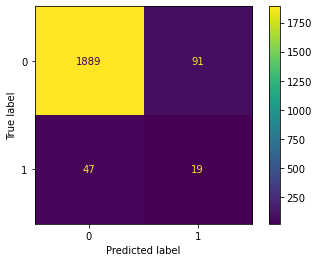

In [17]:
cm = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot()

**Using Grid Search CV to define the parameters**

In [18]:
def print_results_grid(clf):
    
    '''Print the results of the best parameters found by the classifier'''
    
    #Best parametes set
    print('Best parameters found:\n', clf.best_params_)
    print ('Score', svm.score(X_test, y_test))
    # print (clf.cv_results_)
    
    #All results
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [19]:
def my_custom_score(y_true, y_predict, **kwargs):
    
    '''Define a customized score. 
    As the labels of the classes originated from One Class SVM are different from the y, 
    it is necessary modify the labels to use F1 score - macro'''
    
    y_predict[y_predict == 1] = 0
    y_predict[y_predict == -1] = 1
 
    my_f1_score = f1_score(y_true, y_predict, average='macro')
    
    return my_f1_score

In [20]:
score = make_scorer(my_custom_score, greater_is_better=True)

svm = GridSearchCV(OneClassSVM(),
                   scoring= score, 
                   param_grid={'kernel': ['rbf'], 'gamma': ['scale', 'auto', 1e-2, 1e-1, 0.5, 1, 5, 10], 'nu': [0.01, 0.03334, 0.1, 0.2, 0.5]})

svm.fit(X_train_c0, y_train_c0)

# Validating:
# print ('Score in SVM', score(svm, X_test, y_test))
# print ('Score customized', my_custom_score(y_test, svm.predict(X_test)))

print ('Results grid:')
print_results_grid(svm)

Results grid:
Best parameters found:
 {'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.01}
Score 0.5899799599198398
0.491 (+/-0.004) for {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}
0.490 (+/-0.004) for {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.03334}
0.473 (+/-0.007) for {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.1}
0.444 (+/-0.011) for {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.2}
0.333 (+/-0.010) for {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.5}
0.492 (+/-0.004) for {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}
0.490 (+/-0.004) for {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.03334}
0.473 (+/-0.008) for {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.1}
0.443 (+/-0.011) for {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.2}
0.333 (+/-0.011) for {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.5}
0.496 (+/-0.002) for {'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.01}
0.491 (+/-0.005) for {'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.03334}
0.474 (+/-0.008) for {'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.1}
0.444 (

In [21]:
predict_train_c0 = svm.predict(X_train_c0) 
predict_train_c0 = svm.predict(X_train_c1) 
predict_train = svm.predict(X_train) 
predict_test = svm.predict(X_test)

print ('Train_c0:', Counter(predict_train_c0))
print ('Train_c1:', Counter(predict_train_c1))
print ('Train:', Counter(predict_train))
print ('Test:', Counter(predict_test))

predict_train[predict_train == 1] = 0
predict_train[predict_train == -1] = 1
predict_test[predict_test == 1] = 0
predict_test[predict_test == -1] = 1

print ('Y:', Counter(y_test))
print ('Test to compare:', Counter(predict_test))

score = f1_score(y_test, predict_test, average='macro')
print('F1 Score: %.3f' % score)


Train_c0: Counter({1: 140, -1: 14})
Train_c1: Counter({1: 129, -1: 25})
Train: Counter({1: 4712, -1: 61})
Test: Counter({1: 2012, -1: 34})
Y: Counter({0: 1980, 1: 66})
Test to compare: Counter({0: 2012, 1: 34})
F1 Score: 0.590


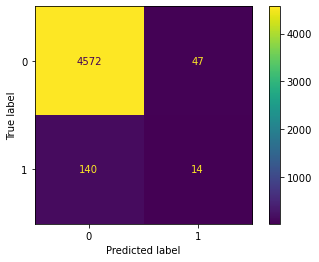

In [22]:
cm = confusion_matrix(y_train, predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot()

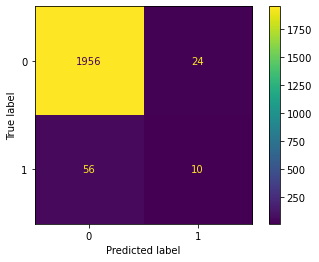

In [23]:
cm = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot()

The resutls using Grid Search CV to selet the best parameters were very similar to our first analyse.
'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.032

In [24]:
evaluation_scenario(svm, y_train, y_test, predict_train, predict_test, df_results, 'SVM-MC', 21)

In [25]:
df_results

,Scenarios,#Features,Train/Test,Acc,Bal_Acc,M_P,M_R,M_F1,P0,P1,R0,R1,MSE,Auc
1,SVM-MC,21 features,Train,0.96,0.54,0.60,0.54,0.56,0.97,0.23,0.99,0.09,0.039,0.54
2,SVM-MC,21 features,Val/Test,0.96,0.57,0.63,0.57,0.59,0.97,0.29,0.99,0.15,0.039,0.57


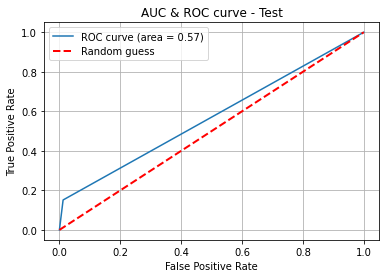

In [26]:
plot_roc_curve(y_test, predict_test, 'Test')

**Considering all dataset**

In [27]:
# select class 0 and 1
X_train_c0 = X_train[y_train==0]
X_train_c1 = X_train[y_train==1]

# define one class svm model (outlier detection/imbalanced data)
fraction_c1 = len(X_train_c1) / len(X_train)  # X_train or X_train_c0
svm = OneClassSVM(kernel='rbf', gamma= 'scale' , nu=fraction_c1) # auto or scale

svm.fit(X_train) # X_train or X_train_c0
predict_train = svm.predict(X_train) 
predict_test = svm.predict(X_test)

print ('Train:', Counter(predict_train))
print ('Test:', Counter(predict_test))

predict_test[predict_test == 1] = 0
predict_test[predict_test == -1] = 1

print ('Y:', Counter(y_test))
print ('Test to compare:', Counter(predict_test))

score = f1_score(y_test, predict_test, average='macro')
print('F1 Score: %.3f' % score)


Train: Counter({1: 4618, -1: 155})
Test: Counter({1: 1956, -1: 90})
Y: Counter({0: 1980, 1: 66})
Test to compare: Counter({0: 1956, 1: 90})
F1 Score: 0.573


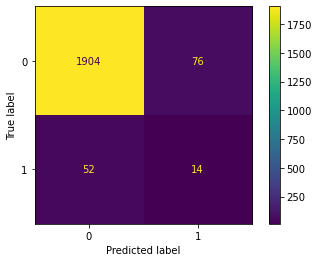

In [28]:
cm = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot()

**Using Grid Search CV to define the parameters**

In [29]:
def print_results_grid(clf):
    
    '''Print the results of the best parameters found by the classifier'''
    
    #Best parametes set
    print('Best parameters found:\n', clf.best_params_)
    print ('Score', svm.score(X_test, y_test))
    # print (clf.cv_results_)
    
    #All results
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [30]:
def my_custom_score(y_true, y_predict, **kwargs):
    
    '''Define a customized score. 
    As the labels of the classes originated from One Class SVM are different from the y, 
    it is necessary modify the labels to use F1 score - macro'''
    
    y_predict[y_predict == 1] = 0
    y_predict[y_predict == -1] = 1
 
    my_f1_score = f1_score(y_true, y_predict, average='macro')
    
    return my_f1_score

In [31]:
score = make_scorer(my_custom_score, greater_is_better=True)

svm = GridSearchCV(OneClassSVM(),
                   scoring= score, 
                   param_grid={'kernel': ['rbf'], 'gamma': ['scale', 'auto', 1e-2, 1e-1, 0.5, 1, 5, 10], 'nu': [0.01, 0.032, 0.1, 0.2, 0.5]})

svm.fit(X_train, y_train)

# Validating:
# print ('Score in SVM', score(svm, X_test, y_test))
# print ('Score customized', my_custom_score(y_test, svm.predict(X_test)))

print ('Results grid:')
print_results_grid(svm)

Results grid:
Best parameters found:
 {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}
Score 0.5800400255107652
0.552 (+/-0.066) for {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}
0.549 (+/-0.052) for {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.032}
0.530 (+/-0.034) for {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.1}
0.504 (+/-0.029) for {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.2}
0.387 (+/-0.020) for {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.5}
0.552 (+/-0.066) for {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.01}
0.549 (+/-0.053) for {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.032}
0.530 (+/-0.033) for {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.1}
0.504 (+/-0.030) for {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.2}
0.387 (+/-0.020) for {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.5}
0.542 (+/-0.039) for {'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.01}
0.549 (+/-0.060) for {'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.032}
0.539 (+/-0.033) for {'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.1}
0.513 (+/-

In [32]:
predict_train = svm.predict(X_train) 
predict_test = svm.predict(X_test)

print ('Train:', Counter(predict_train))
print ('Test:', Counter(predict_test))

predict_train[predict_train == 1] = 0
predict_train[predict_train == -1] = 1
predict_test[predict_test == 1] = 0
predict_test[predict_test == -1] = 1

print ('Y:', Counter(y_test))
print ('Test to compare:', Counter(predict_test))

score = f1_score(y_test, predict_test, average='macro')
print('F1 Score: %.3f' % score)


Train: Counter({1: 4705, -1: 68})
Test: Counter({1: 1974, -1: 72})
Y: Counter({0: 1980, 1: 66})
Test to compare: Counter({0: 1974, 1: 72})
F1 Score: 0.580


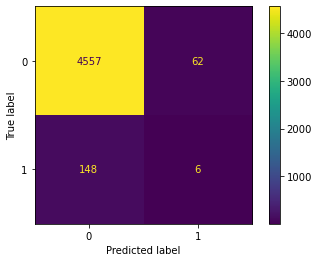

In [33]:
cm = confusion_matrix(y_train, predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot()

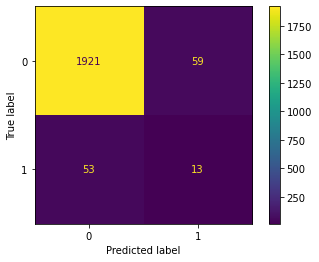

In [34]:
cm = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot()

The resutls using Grid Search CV to selet the best parameters were very similar to our first analyse.
'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.032

In [35]:
evaluation_scenario(svm, y_train, y_test, predict_train, predict_test, df_results, 'SVM-DS', 21)

In [36]:
df_results

,Scenarios,#Features,Train/Test,Acc,Bal_Acc,M_P,M_R,M_F1,P0,P1,R0,R1,MSE,Auc
1,SVM-MC,21 features,Train,0.96,0.54,0.60,0.54,0.56,0.97,0.23,0.99,0.09,0.039,0.54
2,SVM-MC,21 features,Val/Test,0.96,0.57,0.63,0.57,0.59,0.97,0.29,0.99,0.15,0.039,0.57
3,SVM-DS,21 features,Train,0.96,0.51,0.53,0.51,0.52,0.97,0.09,0.99,0.04,0.044,0.51
4,SVM-DS,21 features,Val/Test,0.95,0.58,0.58,0.58,0.58,0.97,0.18,0.97,0.20,0.055,0.58


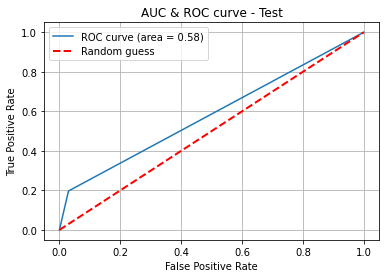

In [37]:
plot_roc_curve(y_test, predict_test, 'Test')

 From the results we could observe that the model was no able to distinguish the data structure between the classes.

## DBSCAN

**DBSCAN - Density-Based Spatial Clustering of Applications with Noise.**   


Based on a set of points, DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

The DBSCAN algorithm basically requires 2 parameters:

- eps: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.

- minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region

The DBSCAN algorithm should be used to find associations and structures in data that are hard to find manually but that can be relevant and useful to find patterns and predict trends.

Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

In our case we will try to identify if our class 1 is in low density regions (that can be identify as outliers, for example). 

In [38]:
df_results_dbscan = pd.DataFrame(columns = ['Scenarios','#Features', 'Train/Test', 'Acc', 'Bal_Acc','M_P','M_R', 'M_F1', "P0", "P1", "R0", "R1", 'MSE', 'Auc'])
print (df_results)

  Scenarios    #Features Train/Test   Acc  Bal_Acc   M_P   M_R  M_F1    P0  \
1    SVM-MC  21 features      Train  0.96     0.54  0.60  0.54  0.56  0.97   
2    SVM-MC  21 features   Val/Test  0.96     0.57  0.63  0.57  0.59  0.97   
3    SVM-DS  21 features      Train  0.96     0.51  0.53  0.51  0.52  0.97   
4    SVM-DS  21 features   Val/Test  0.95     0.58  0.58  0.58  0.58  0.97   

     P1    R0    R1    MSE   Auc  
1  0.23  0.99  0.09  0.039  0.54  
2  0.29  0.99  0.15  0.039  0.57  
3  0.09  0.99  0.04  0.044  0.51  
4  0.18  0.97  0.20  0.055  0.58  


In [39]:
def print_graph(X, y):
    pca = PCA(n_components=2)
    X_r = pca.fit(X).transform(X)

    plt.figure()
    colors = ['blue', 'darkorange']
    lw = 2
    target_names = [0,1]

    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of Bankrupt dataset')

    plt.show()

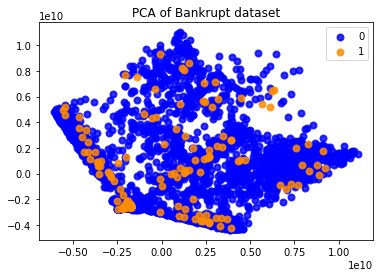

In [40]:
# Before standardize
print_graph(X_train_all, y_train)

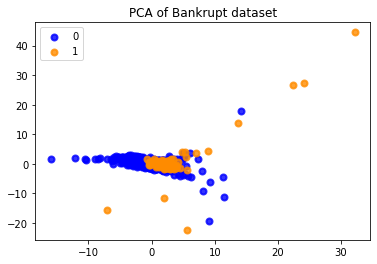

In [41]:
# after standardize
print_graph(X_train, y_train)

In [42]:
def dbscan(X, y):
    
    # define the model
    # eps = The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    model = DBSCAN(eps=3, min_samples=5)
        
    # fit model and predict clusters
    cluster_predicted = model.fit_predict(X)
    
    # retrieve unique clusters
    clusters, counts = np.unique(cluster_predicted, return_counts=True)

    # np.set_printoptions(threshold=np.inf)
    print ('Train')
    # print (cluster_predicted)
    print ('Clusters', clusters)
    print ('Counts', counts)
    print ('Percentage', counts/len(X))
    
    cluster_predicted[cluster_predicted >= 0] = 0
    cluster_predicted[cluster_predicted == -1] = 1
    print (cluster_predicted[cluster_predicted == 1].shape)
    
    print_graph(X, cluster_predicted)
    
    cm = confusion_matrix(y, cluster_predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot()
    

Train
Clusters [-1  0]
Counts [ 158 6661]
Percentage [0.02317055 0.97682945]
(158,)


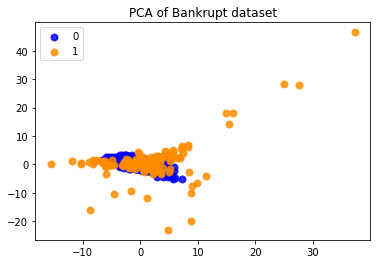

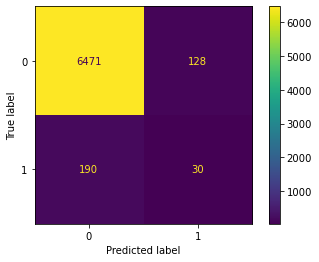

In [43]:
dbscan(X_stand, y)

In [44]:
def dbscan(X, y):
    
    # define the model
    # eps = The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    
    options_eps = [1, 2, 3, 4, 5]
    option_min_samples = [5, 7, 8, 9, 10, 15]
    better_f1=0
    
    for eps in options_eps:
        for min_samples in option_min_samples:
                                 
            model = DBSCAN(eps=eps, min_samples=min_samples)
       
            # fit model and predict clusters
            cluster_predicted = model.fit_predict(X)
    
            # retrieve unique clusters
            clusters, counts = np.unique(cluster_predicted, return_counts=True)
  
            cluster_predicted[cluster_predicted >= 0] = 0
            cluster_predicted[cluster_predicted == -1] = 1
            f1 = f1_score(y, cluster_predicted, average='macro')
            
            '''
            len_class1 = len(cluster_predicted[cluster_predicted == 1])
            print ('eps = ', eps, '/ min. samples = ', min_samples)
            # np.set_printoptions(threshold=np.inf)
            # print (cluster_predicted)
            print ('Clusters', len(clusters))
            print ('detect outliers/class 1: %.2i' % len_class1) 
            print ('Counts (min-max)', min(counts), '-', max (counts))
            print ('Percentage of class', clusters[0], '/ class >=0:', counts[0]/len(X), sum(counts[1:])/len(X))
            print_graph(X, cluster_predicted)
            cm = confusion_matrix(y, cluster_predicted)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
            disp.plot()
            print ('f1 score = ', f1)
            print ()
            print ()
            '''
            
            if f1>better_f1:
                better_f1 = f1
                better_eps = eps
                better_min_samples = min_samples
                better_cluster_predicted = cluster_predicted
            
    print ('Best choice:')
    print (better_f1)
    print ('eps = ', better_eps, '/ min. samples = ', better_min_samples)
            
    
    plot_roc_curve(y, better_cluster_predicted, 'All dataset')
    evaluation_set(0, y, better_cluster_predicted, df_results_dbscan, 'All dataset', 'DBScan-00', 21)
    
    best_cm = confusion_matrix(y, better_cluster_predicted)
    best_disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=[0,1])
    best_disp.plot()

Best choice:
0.569640339733879
eps =  3 / min. samples =  8


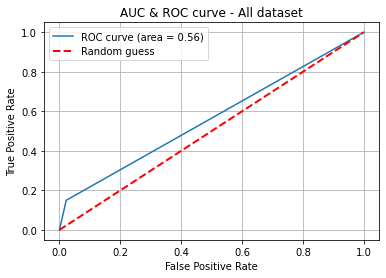

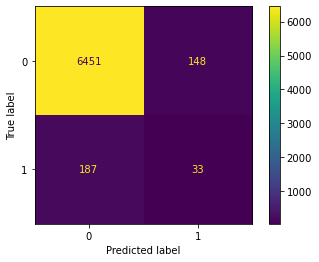

In [45]:
dbscan(X_stand, y)

In [46]:
df_results_dbscan

,Scenarios,#Features,Train/Test,Acc,Bal_Acc,M_P,M_R,M_F1,P0,P1,R0,R1,MSE,Auc
1,DBScan-00,21 features,All dataset,0.95,0.56,0.58,0.56,0.57,0.97,0.18,0.98,0.15,0.049,0.56


We could not identify our class 1 as outliers. Probably they are not so sparse to be considered as outliers.